# Gradient Descent (Default slope)

The program attempts to calculate the optimum value of the intercept in order to fit the line to the given data. Here, the least sum of squares method is used as a loss function and the slope is assumed to be set by default. Hence, here, the gradient descent algorithm attempts to optimize the value of the intercept.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *
from scipy.interpolate import  make_interp_spline,BSpline

In [ ]:
weights = [0.5,2.3,2.9]
heights = [1.4,1.9,3.2]

In [ ]:
xlim_min = 0
xlim_max = 4
ylim_min = 0
ylim_max = 4

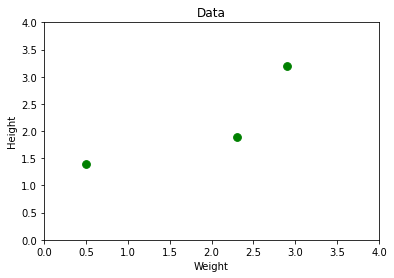

In [ ]:
plt.scatter(weights,heights,s=60,c='green')
plt.title('Data')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.xlim(xlim_min,xlim_max)
plt.ylim(ylim_min,ylim_max)
plt.show()

In [ ]:
#setting slope to 0.64
slope = 0.64

intercept_start = float(input('Enter initial value of intercept: '))
min_step_size = float(input('Enter minimum step size: '))
#print(intercept_start)
max_steps = float(input('Enter maximum number of steps: '))
learning_rate = float(input('Enter learning rate: '))

Enter initial value of intercept: 0
Enter minimum step size: 0.001
Enter maximum number of steps: 100
Enter learning rate: 0.1


**Sum of squares** = summation over all data((observed height-predicted height)^2)

In [ ]:
#c = intercept, x = weight

x, c, m, y = symbols('x c m y')
expr = []

residual = (y - (c + m*x))**2 #equation
der_obj = Derivative(residual,c) #Derivative object wrt c
derivative = der_obj.doit() #Expression after derivation
print('Derivative of expr wrt to c is: {}'.format(derivative))

Derivative of expr wrt to c is: 2*c + 2*m*x - 2*y


In [ ]:
intercept_values = []
intercept_values.append(intercept_start)

In [ ]:
intercept_val = intercept_start
number_of_steps = 0
while True:
  for iter in range(len(weights)):
    expr2 = derivative.subs([(c,intercept_val),(m,slope),(x,weights[iter]),(y,heights[iter])])
    expr.append(round(expr2.evalf(),2))
  slope_of_curve = float(sum(expr))
  expr = []
  #print('Slope is => {}'.format(slope_of_curve))
  step_size = slope_of_curve * learning_rate
  #print('Step Size = {}'.format(step_size))
  intercept_val = intercept_val - step_size
  #print('New Intercept = {}'.format(intercept_val))
  number_of_steps = number_of_steps + 1 
  #print('Number of steps = {}'.format(number_of_steps))
  intercept_values.append(intercept_val)
  #residual_scores.append()
  if (abs(step_size) <= min_step_size or number_of_steps>=max_steps):
    break

In [ ]:
print(intercept_val)

0.9510000000000002


In [ ]:
res_scores = []
residual_scores = []

In [ ]:
for value in intercept_values:
  for iter in range(len(weights)):
    res_scores.append(residual.subs([(c,value),(m,slope),(x,weights[iter]),(y,heights[iter])]).evalf())   
  residual_scores.append(sum(res_scores))
  res_scores = []
print(residual_scores)

[3.15592000000000, 0.877059000000000, 0.513627000000000, 0.455660000000000, 0.446299000000000, 0.444899000000000, 0.444659000000000, 0.444627000000000, 0.444620000000000, 0.444619000000000, 0.444619000000000]


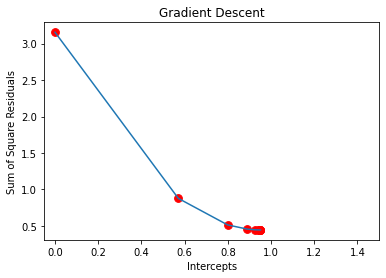

In [ ]:
plt.scatter(intercept_values,residual_scores,s=60,c='red')
plt.plot(intercept_values,residual_scores)
plt.xlabel('Intercepts')
plt.ylabel('Sum of Square Residuals')
plt.title('Gradient Descent')
plt.xlim(-0.05,1.5)
plt.show()